**In20-S4-CS3111 - Introduction to Machine Learning**

# Supervised Machine Learning with KNN and Decision trees

Upon completion of this session you should be able to:

*   understand how kNN and Decision Tree algorithms work
*   apply these supervised learning algorithms using Python in real world data






# 1.   k-Nearest Neighbours 
kNN is a non-parametric technique which is extensively used in practice. KNN can be used for both classification and regression predictive problems. KNN falls in the supervised learning family of algorithms. For kNN Classifier, input consists of the k closest training examples and the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

First, we import the required libraries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#seaborn: statistical data visualization. 
#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

#%matplotlib inline

#To switch to seaborn defaults, simply call the set() function.
sns.set()

**1.1 Data Loading**

To be able to illustrate how we perform kNN classification in Python, we need some data first. Therefore we import standard iris data sets. Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. The dataset has four attributes sepal length, sepal width, petal length, and petal width and also a class label for each instance.

In [ ]:
# Importing iris dataset
from sklearn import datasets
iris = datasets.load_iris()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# np.c_ is the numpy concatenate function
dataset = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= feature_names + ['species'])

print('The shape of the dataset is ' + str(dataset.shape))
dataset.head()

The shape of the dataset is (150, 5)


sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2      0.0
1           4.9          3.0           1.4          0.2      0.0
2           4.7          3.2           1.3          0.2      0.0
3           4.6          3.1           1.5          0.2      0.0
4           5.0          3.6           1.4          0.2      0.0

In [ ]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Next, we are splitting the dataset into X (features) and Y (targets/labels) for the machine learning task

In [ ]:
X = dataset[feature_names]
y = dataset['species']

In [ ]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: species, dtype: float64

**1.2 Data Visualisation**

Visualising the dataset is tricky with this dataset since it has 4 features. One way to visualise is using pairplot. Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

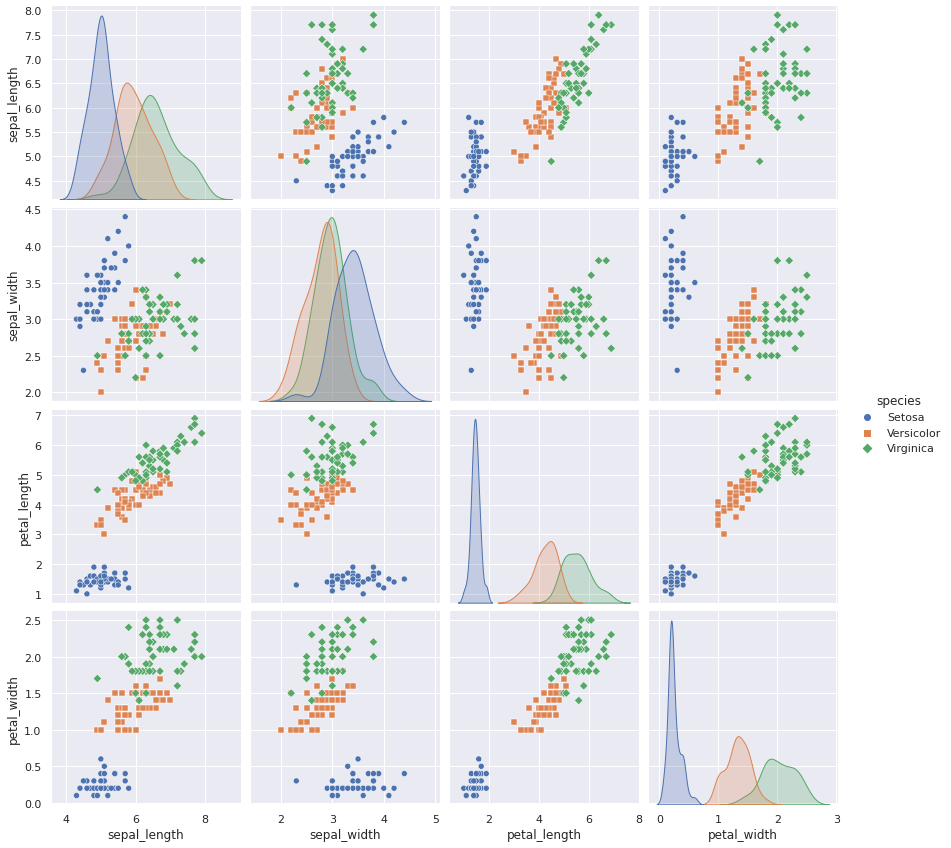

In [ ]:
# View the relationships between variables; color code by species type
di = {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

plt.figure()
sns.pairplot(dataset.replace({'species': di}), hue = "species", size=3, markers=["o", "s", "D"])
plt.show()

Another way to visualise high dimensional features is using 3D plot using color, shape, size and other properties of 3D and 2D objects. In this plot, the 'mark sizes' is utilised to visualize fourth dimenssion which is Petal Width [cm].

<ipython-input-20-272f16d3052a>:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=48, azim=134)


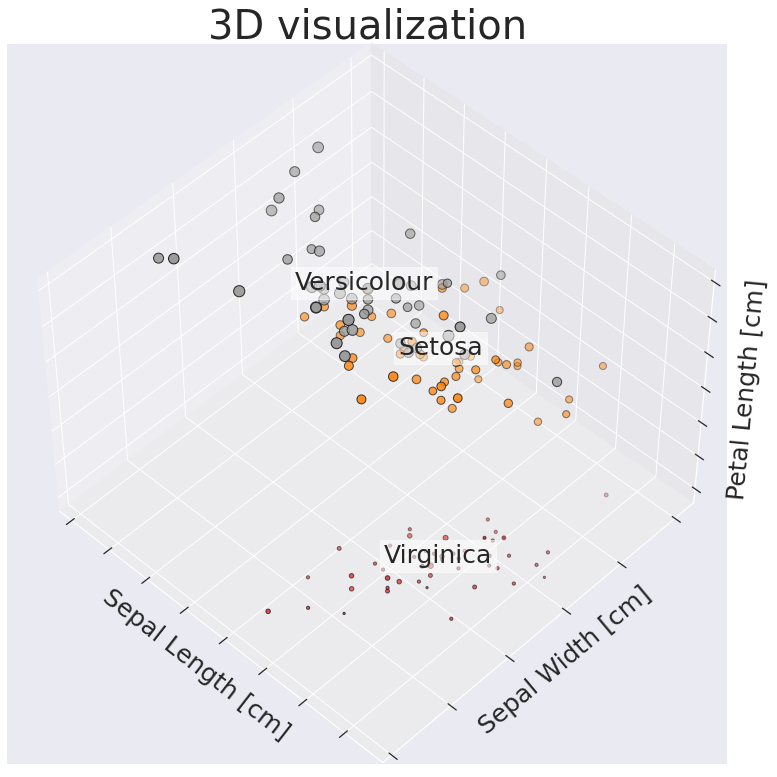

In [ ]:
X = dataset[feature_names].values   #To get the array of feature columns' values
y = dataset['species'].values       #To get the array of target/labels

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1],X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s =  X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

**1.3 Splitting the dataset into training set and test set**


In [ ]:
X = dataset[feature_names].values   #To get the array of feature columns' values
y = dataset['species'].values       #To get the array of target/labels

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)

print(f'training set size: {X_train.shape[0]} samples \ntest set size: {X_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


Normalising the features of the dataset before training (One of the Feature Scaling Techniques). There are some other Feature scaling techniques such as: Standardisation and Min_Max scaler. In our case, We use normalisation to bring all the feature values in the range of [0,1]

In [ ]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train = scaler.fit_transform(X_train) #the scaler is fitted to the training set and then transformed
X_test = scaler.transform(X_test)       #the scaler is applied to the test set

**Exercise**: Try here, other feature engineering techniques that you have learned in previous week.

1.4 Making Predictions

In [ ]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = knn_classifier.predict(X_test)

1.5 Evaluating the predictions

Building confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Calculating model accuracy:

In [ ]:
from sklearn.metrics import  accuracy_score

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the kNN classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the kNN classifier is equal 96.67 %.


Exercise: Modify the hyperparameter, 'n_neighbors' with some values, check and compare the performance of KNN classifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=  ##)

Using cross-validation for parameter tuning. In kNN classifier, one of the main parameter that needs to be tuned is 'k' value. To find the optimum value for k (that is the number of neighbours to look into while classifying), the following steps are done

In [ ]:
# creating list of K for KNN
k_list = list(range(1,20))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

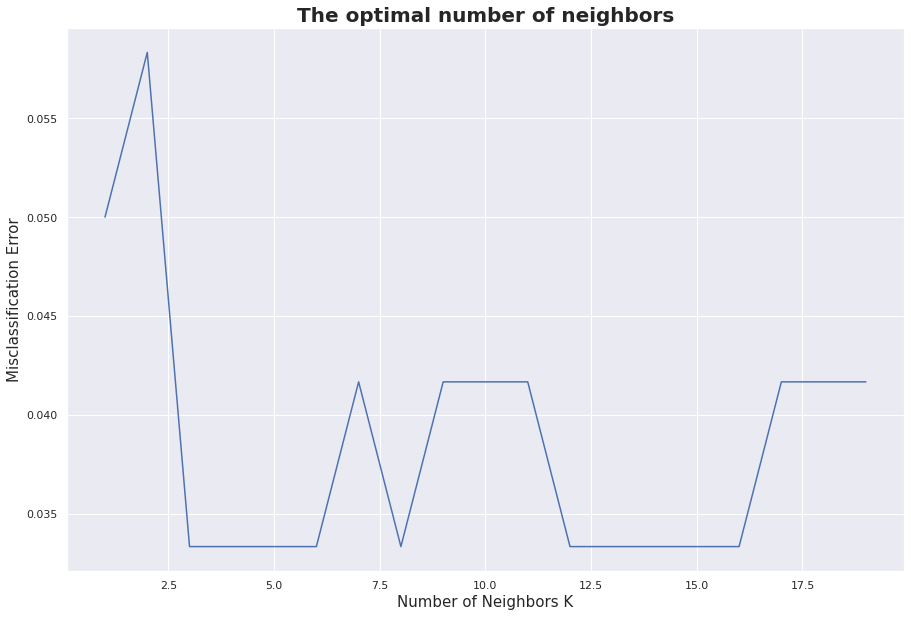

In [ ]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


# **2. Decision Trees**

Decision Tree is much more intuitive than the others for its explainability. Visualizing them is crucial in order to correctly understand how certain decisions are being made inside the algorithm, which is always important for business applications.

Lets create a simple Decision Tree Classifier and fit it on the training dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree
fig, _ = plt.subplots(nrows=1, ncols=1, figsize=(100,50), dpi=300)
tree.plot_tree(
    decision_tree,
    feature_names=feature_names,
    filled=True
)
fig.savefig('tree.png')

Using Decision tree to predict and then evaluating the model with the similar steps as we used with kNN classifier

In [ ]:
y_pred = decision_tree.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of the Decision Tree classifier is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of the Decision Tree classifier is equal 96.67 %.


Using cross validation score to evaluate the model

In [ ]:
accuracy_list = cross_val_score(decision_tree, X_train, y_train, cv=10)
print(f'The average accuracy is {(np.mean(accuracy_list)*100).round(2)}%')

The average accuracy is 94.17%


**Exercise:** Look for hyperparameters of the Decision Tree model, and tune them to get better accuracy